In [8]:
from fastai.text import *
import matplotlib.pyplot as plt
from statistics import mean, median, mode
print ('kernel working')

kernel working


In [9]:
df_train = pd.read_csv('../train/powerplay11_train.csv')
df_train.dropna(inplace=True)
df_train.head()

,sentence,label,answer
0,I want to know about offers and referral programs,OFFERS_AND_REFERRALS,These are few *OFFERS_AND_REFERRALS*
1,What are offers and referral programs available,OFFERS_AND_REFERRALS,These are few *OFFERS_AND_REFERRALS*
2,Show me some offers and referrals program,OFFERS_AND_REFERRALS,These are few *OFFERS_AND_REFERRALS*
3,Offers and Referrals,OFFERS_AND_REFERRALS,These are few *OFFERS_AND_REFERRALS*
4,Do you have any referral offer,OFFERS_AND_REFERRALS,These are few *OFFERS_AND_REFERRALS*


In [10]:
df_train.shape

(471, 3)

In [11]:
df_test = pd.read_csv('../test/powerplay11_test.csv')
df_test.head()

,sentence,label
0,Unable play,NO_NODES_DETECTED
1,I am unable to join any contest,NO_NODES_DETECTED
2,My team not creative way,NO_NODES_DETECTED
3,Unable to create team and join,NO_NODES_DETECTED
4,I m playing from long time but but i m not abl...,NO_NODES_DETECTED


In [12]:
df_test.shape

(983, 2)

In [13]:
# No. of Inscope queries, No. of OOS queries
print('Inscope queries in Test set: ', df_test[df_test['label']!='NO_NODES_DETECTED'].shape[0])
print('OOS queries in Test set: ', df_test[df_test['label']=='NO_NODES_DETECTED'].shape[0])

Inscope queries in Test set:  275
OOS queries in Test set:  708


In [14]:
# No of classes
print('No of classes: ', len(set(df_train['label'])))

No of classes:  59


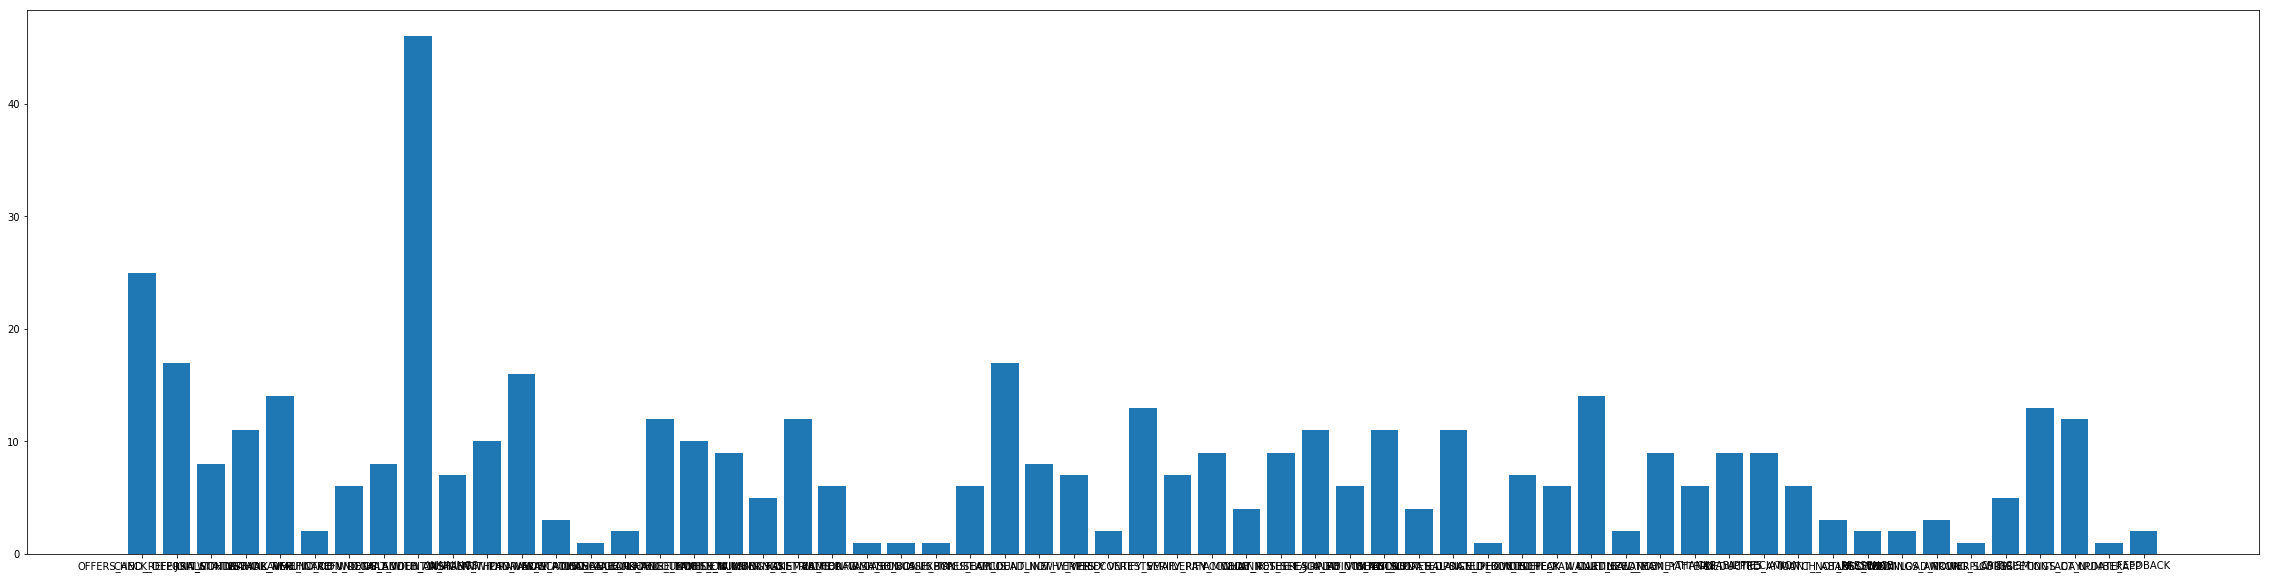

In [15]:
# Class distribution in training set
D = Counter(df_train['label'])
plt.rcParams["figure.figsize"] = (40,10)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [16]:
# Min, Max, Avg no of sentences per class in Training set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  1
Max no. of sentences:  46
Avg no. of sentences:  7.983050847457627
Median of sentences:  7


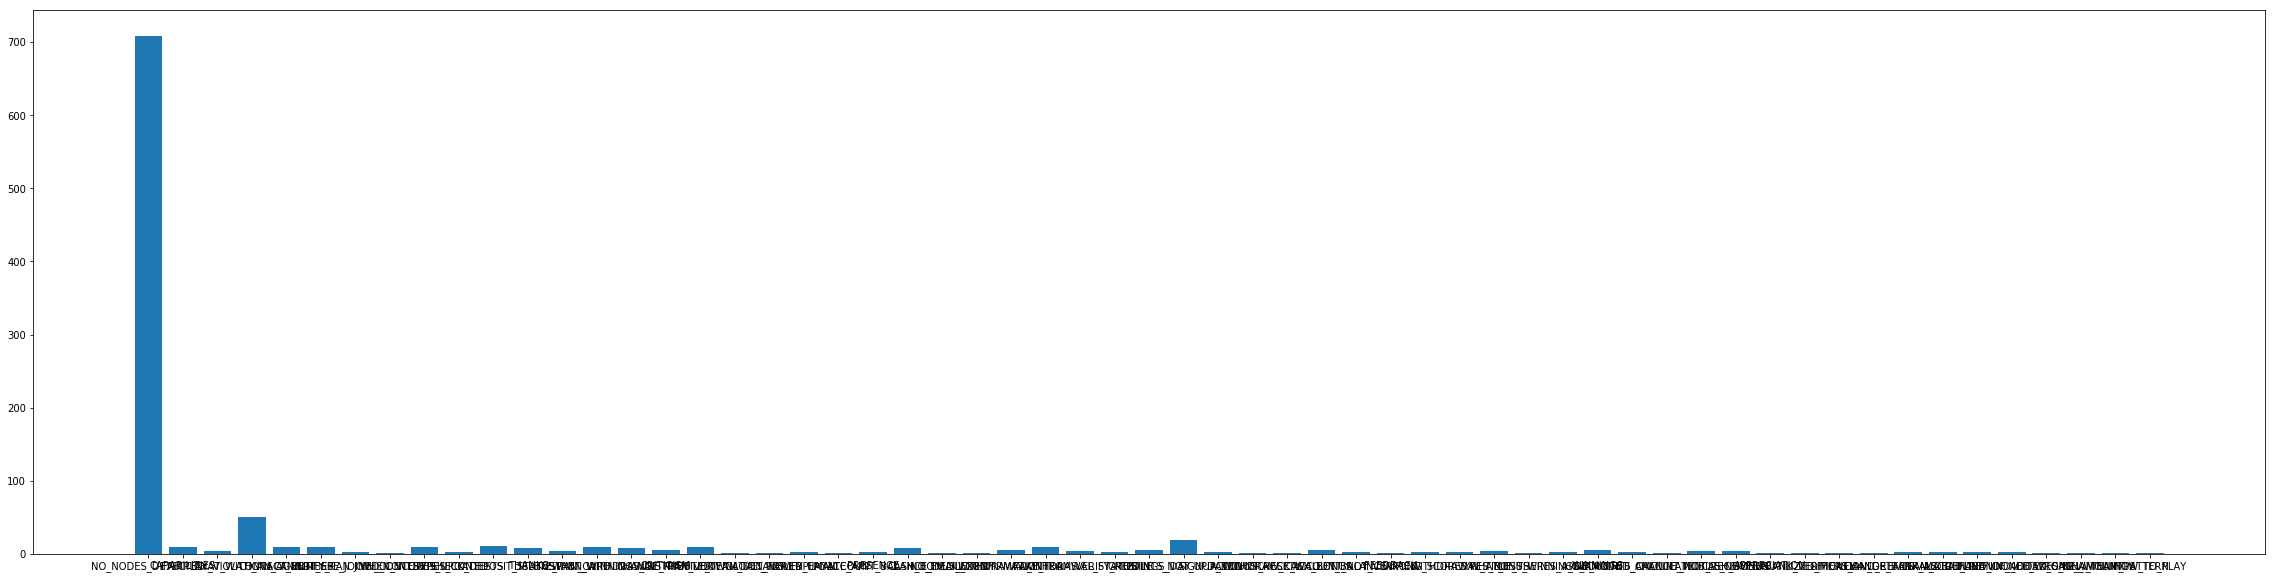

In [17]:
# Class distribution in test set
D = Counter(df_test['label'])
plt.rcParams["figure.figsize"] = (40,10)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [18]:
# OOV words/Domain specific words and Spelling mistakes in train set
with open("/home/ubuntu/gaurav/.fastai/models/wt103-fwd/itos_wt103.pkl", "rb") as input_file:
    wiki_itos = pickle.load(input_file)
tok = SpacyTokenizer('en')
oov_tokens = []
for index, row in df_train.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t not in wiki_itos:
            oov_tokens.append(t)
oov_tokens = list(set(oov_tokens))
print(oov_tokens)

['unutilized', "n't", 'fairplay', 'debited', 'nope', 'thanxs', 'withdrawalis', 'signup', 'referrals', 'palyed', 'addded', 'refundable', 'infront', 'goodafternoon', 'tysm', 'powerplay11', ' ', 'battsman', 'receiev', 'bolwers']


In [19]:
# OOV words/Domain specific words and Spelling mistakes in test set
with open("/home/ubuntu/gaurav/.fastai/models/wt103-fwd/itos_wt103.pkl", "rb") as input_file:
    wiki_itos = pickle.load(input_file)
tok = SpacyTokenizer('en')
oov_tokens = []
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t not in wiki_itos:
            oov_tokens.append(t)
oov_tokens = list(set(oov_tokens))
print(oov_tokens)

['gya', 'kyon', 'deka', 'rs.100', 'क्युकी', 'showimg', 'urs', 'aaiyega', 'leages', 'naik', 'milga', 'नहीं', 'verfiy', 'pcct', 'ओर', 'veryindication', 'kashiadanga', 'aisq', 'चाहिए', 'गए', 'gando', 'kaise', 'kya', 'i.e', 'taipai', 'cleck', 'garbari', 'rupee', 'kro', 'chaiye', 'lagaya', 'apna', 'diya', 'dete', 'ट्रांसफर', ' \n', 'gra', 'diclaned', 'samil', '2time', 'nhi', '300rs', '8768768769', 'transection', 'wicke', 'लीग', '❓', 'rupuye', 'amaunt', 'deactivation', '😂', 'quize', 'बोनस', 'maich', 'abonden', 'आए', 'liya', 'ludo', 'nitish', 'muhamma', 'कैसे', 'any1', 'chalu', 'कितना', 'निकल', '-1', 'ebm', 'enthasepu', 'aaya', '49rs', 'खुल', 'mandal', 'subah', 'yanukevich', '  ', 'lagaye', 'के', 'evng', '🎉', 'diposit', '2wicket', 'iser', 'उपयोग', 'mohit', 'मयटीम', 'apk', 'msg', 'बताए', 'hamara', '\xa0\n\n\xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 ', 'sath', 'thanx', 'potis', 'raha', 'bataye', 'bnate', 'barshila', 'batao', 'अ', 'jitne', 'nehi', 'chuka', 'bheja', 'gamil', 'mujahid', 'jaraha', 'legue',

In [20]:
# Few examples of code-mixed sentences in test set
hinglish_words = ['chaiye', 'jaate', 'hamra', 'kitni', 'koshish', 'dene', 'galat', 'nehi', 'tita', 'krte']
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t in hinglish_words:
            print(row['sentence'])
            break

Team join karne ke liye koshish karta hun joining Nahin Hota Hai Kyon
Other people team dene content team points updated
Sir my point Sahi sa chak kara hamra sath farod hu ha
Tita huwa maich ka kais nhi mila hai
Point kyon galat chadhaya 1match ma
Mai kitni bar complain kru
Call Nehi jaraha hay
Taipay t 10 league ka winning money ab v 100rs mere account me Nehi ayaa
Mujh free league chaiye
Please check basketball mach ka refand nehi aya he
Tum log Jaan bujh kar kisi Ko jitne nahin jaate Ho khud winner ban jaate Ho
Unka result late ku krte ho


In [21]:
# Few examples of spelling mistakes in test set
spelling_mistakes = ['froud', 'showimg', 'verfiy', 'contast', 'quize', 'balc', 'contect', 'friand']
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t in spelling_mistakes:
            print(row['sentence'])
            break

No cas contast
Real time quize is not working now..why?
sir mera kisi contast me samil nahi  
ho pa rahe hai kya karan hai
Sir mera contast join nahi ho raha hai
There is froud here
This is froud app
Maine  2 friand  send Kiya h  kuch Mila nhi
Froud app
Last balance was 11800.. had won one  contest 150 is showimg as winning but not credited yet
My account verfiy
Please give me your contect number
My balc was missing


In [22]:
# Few examples of slangs in test set
slang_words = ['msg', 'evng', 'okk', 'tnq', 'plzz', 'gudnt']
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t in slang_words:
            print(row['sentence'])
            print('\n\n')
            break

I try to join any contest but showing me unfortunately, PowerPlay11 stopped,
Why this msg come in my screen



Ok tnq..



Sir mera pan card kisi aur id me submit hain plzz mujhe ye id change karni hain



Okk



Gudnt



And dont reply to my last msg



Sir pahle aap mere balance bhej de dijiye plzz



Hi good evng review money football





In [24]:
# Examples of grammatically incorrect sentences
print('Match finisher yesterday what not transfer my money this time')
print("I want update my bank details")
print("How much time take to declare the winner after match finished")
print("Now I add but cash not show in wallet")
print("I poor man")

Match finisher yesterday what not transfer my money this time
I want update my bank details
How much time take to declare the winner after match finished
Now I add but cash not show in wallet
I poor man


In [17]:
# variation in length of sentences in train set
len_of_tokens = []
for index, row in df_train.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  31
Avg no. of tokens:  5.033970276008493
Median of no. of tokens:  4


In [18]:
# variation in length of sentences in test set
len_of_tokens = []
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  73
Avg no. of tokens:  7.2868769074262465
Median of no. of tokens:  6


In [25]:
# are there any queries in other than latin script in train set
def is_english(s: str) -> bool:
    if len(re.findall(u'[\u0900-\u097F]', s)):
        return False
    return True

for index, row in df_train.iterrows():
    if not is_english(row['sentence']):
        print(row['sentence'])

In [26]:
# are there any queries in other than latin script in test set
def is_english(s: str) -> bool:
    if len(re.findall(u'[\u0900-\u097F]', s)):
        return False
    return True

for index, row in df_test.iterrows():
    if not is_english(row['sentence']):
        print(row['sentence'])

टीम ज्वाईन नही हो रहा
हेल्लो सर मुझे मयटीम ११ के अकाउंट की पूरी जानकारी चाहिए, कितना डिपोजिट हुआ कितना निष्कासित हुआ है,क्युकी मुझे अब PowerPlay11 से जुड़े रहना है जिसके लिए ,, 
हम पहले विस्तार से अपने डिपोजिट ओर निष्कासित का जीत ता हार की विवरण जानना है ,
मेरे अकाउंट मे पैसे नही जमा हुए
मुझे 1000 हजार रुपये निकलने है निकल नही रहे
मैंने कल अपने पैसे ₹200 बैंक में ट्रांसफर किए अभी तक नहीं आए
पुराना id नहीं खुल रहा है
सर Belarus premier league का wining zone अपडेट क्यु नहीं ho रहा कृपया बताए
सर दो दिन हो गए contest का कोई अपडेटेड नहीं आया कृप्या बताए
सर Nicaragua फुटबाल लीग का 2 दिन हो गए contest लगाए हुए कोई अपडेटेड नहीं आया है कृपया बताए अभी तक अपडेट क्यु नहीं आया
बोनस राशि का उपयोग नहीं कर पा रहे हैं
पेसे  निकाले कैसे
पैसा नही आया मेच नही हुआ अ
